# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import datetime as dt

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv('H2HBABBA1887.csv')
#Here i am importing given dataset and getting shape of dataset.

### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999100e+04,50000.000000
mean,2019.305700,2.011140e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32442.700569,2.019354e+07,2.009792e+09,0.200000
std,0.460708,2.919423e+08,4.501673e+03,4.484383e+03,4.471639e+03,0.0,NaN,39616.614082,4.483778e+03,2.741293e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018063e+07,2.018032e+07,1.0,NaN,1.620000,2.018031e+07,1.928502e+09,0.000000
25%,2019.000000,1.929336e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4911.067500,2.019051e+07,1.929336e+09,0.000000
50%,2019.000000,1.929957e+09,2.019091e+07,2.019091e+07,2.019092e+07,1.0,NaN,17578.080000,2.019091e+07,1.929957e+09,0.000000
75%,2020.000000,1.930617e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47037.842500,2.020013e+07,1.930615e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,813905.360000,2.020052e+07,2.960635e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930815e+09,2020-04-28,20200422,20200428,20200513.0,USD,RV,1.0,NaN,6361.07,20200428.0,NAH4,1.930815e+09,1
1,U001,0200729828,KENNETH foundation,2019-09-25 00:00:00,2019.0,1.929826e+09,2019-09-06,20190903,20190906,20190926.0,USD,RV,1.0,NaN,27848.46,20190906.0,NAD1,1.929826e+09,0
2,U001,CCU013,KRAFT F trust,NaN,2020.0,1.930666e+09,2020-03-16,20200317,20200316,20200316.0,USD,RV,1.0,NaN,5095.68,20200316.0,NAX2,1.930666e+09,1
3,U001,0200780383,MEIJ us,2019-09-30 00:00:00,2019.0,1.929852e+09,2019-09-09,20190909,20190909,20190924.0,USD,RV,1.0,NaN,81781.59,20190909.0,NAA8,1.929852e+09,0
4,U001,0200792293,UNIFIE llc,2019-11-22 00:00:00,2019.0,1.930113e+09,2019-11-05,20191105,20191105,20191120.0,USD,RV,1.0,NaN,67352.17,20191105.0,NAA8,1.930113e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
df.isnull().sum() / df.shape[0] * 100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.018
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df[["invoice_id", "doc_id"]]

,invoice_id,doc_id
0,1.930815e+09,1.930815e+09
1,1.929826e+09,1.929826e+09
2,1.930666e+09,1.930666e+09
3,1.929852e+09,1.929852e+09
4,1.930113e+09,1.930113e+09
...,...,...
49995,1.928608e+09,1.928608e+09
49996,1.928704e+09,1.928704e+09
49997,1.930838e+09,1.930838e+09
49998,1.930560e+09,1.930560e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
check = np.where((df['document_create_date.1'] == df['document_create_date']), "Same", "Different")
check1 = pd.DataFrame(check, columns=['Same/Different'])
check = np.where((df['document_create_date.1'] == df['baseline_create_date']), "Same", "Different")
check2 = pd.DataFrame(check, columns=['Same/Different'])
#We found that baseline_create_date and document_create_date	 values are nearly same.
[pd.DataFrame(check1.value_counts()), pd.DataFrame(check2.value_counts())]
#extra cell

[                    0
 Same/Different       
 Different       28858
 Same            21142,
                     0
 Same/Different       
 Same            44639
 Different        5361]

#### Please check, Column 'posting_id' is constant columns or not


In [11]:
df["posting_id"].nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
df["isOpen"].nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
cols = ["area_business", "posting_id", "invoice_id", "document_create_date", "isOpen", "document type",
        "document_create_date.1"]
df.drop(cols, axis=1, inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [15]:
#Showing the 1st value amongst duplicated values which is denoted by 'first'
df[df.duplicated(keep='first')]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
202,CA02,0140105686,SYSC us,2019-08-15 00:00:00,2019.0,2.960569e+09,2019-07-30,20190812.0,CAD,12415.20,20190802.0,CA10
2292,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930775e+09,2020-04-11,20200426.0,USD,29819.97,20200411.0,NAH4
2629,U001,0200762301,C&S WH foundation,2019-05-29 00:00:00,2019.0,1.929313e+09,2019-05-13,20190528.0,USD,62692.58,20190513.0,NAC6
2767,U001,0200418007,AM corp,2019-03-11 00:00:00,2019.0,1.928826e+09,2019-02-23,20190310.0,USD,277.44,20190223.0,NAA8
2948,CA02,0140104240,FEDER in,NaN,2020.0,2.960626e+09,2020-04-05,20200423.0,CAD,150970.75,20200413.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49858,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930716e+09,2020-04-01,20200416.0,USD,30.64,20200401.0,NAH4
49860,U001,0200705372,FR co,NaN,2020.0,1.930779e+09,2020-04-17,20200502.0,USD,61269.48,20200417.0,NAA8
49873,U001,0200726979,BJ'S llc,2019-09-24 00:00:00,2019.0,1.929858e+09,2019-09-09,20190924.0,USD,556.78,20190909.0,NAA8
49879,U001,0200943457,BERN in,2019-06-12 00:00:00,2019.0,1.929269e+09,2019-05-07,20190606.0,USD,48056.53,20190507.0,NAD5


### Display the Number of Duplicate Rows

In [16]:
df.duplicated().sum()

1146

### Drop all the Duplicate Rows

In [17]:
df.drop_duplicates(keep='first', inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [19]:
df.shape

(48854, 12)

### Find out the total count of null values in each columns

In [20]:
pd.DataFrame(df.isnull().sum())

,0
business_code,0
cust_number,0
name_customer,0
clear_date,9722
buisness_year,0
doc_id,0
posting_date,0
due_in_date,0
invoice_currency,0
total_open_amount,0


# Data type Conversion 

### Please check the data type of each column of the dataframe

In [21]:
pd.DataFrame(df.dtypes)

,0
business_code,object
cust_number,object
name_customer,object
clear_date,object
buisness_year,float64
doc_id,float64
posting_date,object
due_in_date,float64
invoice_currency,object
total_open_amount,float64


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
pd.DataFrame(df[["clear_date", "posting_date", "due_in_date", "baseline_create_date"]].dtypes)

,0
clear_date,object
posting_date,object
due_in_date,float64
baseline_create_date,float64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
def date_format(date):
    x = str(date)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    return dt.datetime(year, month, day)


# Down-casting date columns from float to int
df['buisness_year'] = pd.to_numeric(df['buisness_year'], downcast='integer')
df['due_in_date'] = pd.to_numeric(df['due_in_date'], downcast='integer')
df['baseline_create_date'] = pd.to_numeric(df['baseline_create_date'], downcast='integer')

# Applying the date formatter
df['due_in_date'] = df['due_in_date'].apply(date_format)
df['baseline_create_date'] = df['baseline_create_date'].apply(date_format)

# Converting object type to datetime format
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

# Printing the head of the df
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR in,NaT,2020,1.930815e+09,2020-04-28,2020-05-13,USD,6361.07,2020-04-28,NAH4
1,U001,0200729828,KENNETH foundation,2019-09-25,2019,1.929826e+09,2019-09-06,2019-09-26,USD,27848.46,2019-09-06,NAD1
2,U001,CCU013,KRAFT F trust,NaT,2020,1.930666e+09,2020-03-16,2020-03-16,USD,5095.68,2020-03-16,NAX2
3,U001,0200780383,MEIJ us,2019-09-30,2019,1.929852e+09,2019-09-09,2019-09-24,USD,81781.59,2019-09-09,NAA8
4,U001,0200792293,UNIFIE llc,2019-11-22,2019,1.930113e+09,2019-11-05,2019-11-20,USD,67352.17,2019-11-05,NAA8


### Please check the datatype of all the columns after conversion of the above 4 columns

In [24]:
pd.DataFrame(df.dtypes)

,0
business_code,object
cust_number,object
name_customer,object
clear_date,datetime64[ns]
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
invoice_currency,object
total_open_amount,float64


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [25]:
pd.DataFrame(df["invoice_currency"].value_counts())

,invoice_currency
USD,45099
CAD,3755


#### display the "total_open_amount" column value

In [26]:
df[["total_open_amount"]]

,total_open_amount
0,6361.07
1,27848.46
2,5095.68
3,81781.59
4,67352.17
...,...
49995,290.59
49996,1957.09
49997,7595.36
49998,522.38


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [27]:
df['converted_usd'] = np.where(df['invoice_currency'] == 'CAD', df['total_open_amount'] * 0.7, df['total_open_amount'])

### Display the new "converted_usd" column values

In [28]:
df[['converted_usd']]

,converted_usd
0,6361.07
1,27848.46
2,5095.68
3,81781.59
4,67352.17
...,...
49995,290.59
49996,1957.09
49997,7595.36
49998,522.38


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [29]:
pd.DataFrame(df["buisness_year"].value_counts())

,buisness_year
2019,33965
2020,14889


### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [30]:
df.drop(['invoice_currency', 'total_open_amount'], axis=1, inplace=True)

### Write a code to check the number of columns in dataframe

In [31]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [32]:
columns = [i for i in df.isnull().any().keys() if df.isnull().any()[i] == True]
columns
#Output print only clear_date column name

['clear_date']

#### Find out the number of null values from the column that you got from the above code

In [33]:
columns_null_sums = pd.Series([])
for i in columns:
    columns_null_sums[i] = df.isnull().sum()[i]
columns_null_sums

clear_date    9722
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [34]:
nulldata = df.loc[df['clear_date'].isnull()]
maindata = df.loc[~df['clear_date'].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [35]:
maindata.shape

(39132, 11)

In [36]:
nulldata.shape

(9722, 11)

### Display the 5 records from maindata and nulldata dataframes

In [37]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
1,U001,0200729828,KENNETH foundation,2019-09-25,2019,1.929826e+09,2019-09-06,2019-09-26,2019-09-06,NAD1,27848.46
3,U001,0200780383,MEIJ us,2019-09-30,2019,1.929852e+09,2019-09-09,2019-09-24,2019-09-09,NAA8,81781.59
4,U001,0200792293,UNIFIE llc,2019-11-22,2019,1.930113e+09,2019-11-05,2019-11-20,2019-11-05,NAA8,67352.17
5,U001,0200833713,JETRO llc,2019-04-09,2019,1.929002e+09,2019-03-20,2019-04-04,2019-03-20,NAA8,1696.56
6,U001,0200769623,WAL-MAR corp,2020-02-24,2020,1.930510e+09,2020-02-10,2020-02-25,2020-02-10,NAH4,14213.45


In [38]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR in,NaT,2020,1.930815e+09,2020-04-28,2020-05-13,2020-04-28,NAH4,6361.07
2,U001,CCU013,KRAFT F trust,NaT,2020,1.930666e+09,2020-03-16,2020-03-16,2020-03-16,NAX2,5095.68
10,U001,0200769623,WAL-MAR corp,NaT,2020,1.930711e+09,2020-03-28,2020-04-12,2020-03-28,NAH4,31228.04
11,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,40491.29
16,U001,0200769623,WAL-MAR corp,NaT,2020,1.930838e+09,2020-04-29,2020-05-14,2020-04-29,NAH4,18453.58


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [39]:
maindata["Delay"] = maindata["clear_date"] - maindata["due_in_date"]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [40]:
avg_delay = pd.DataFrame(maindata.groupby('name_customer')['Delay'].mean(numeric_only=False))
avg_delay.rename(columns={'Delay': 'avg_Delay'}, inplace=True)
avg_delay

,avg_Delay
name_customer,
10167 systems,-1 days
11078 corporation,1 days
11078 llc,7 days
17135 in,3 days
236008 corporation,7 days
...,...
YEN BROS foundation,0 days
YEN BROS us,-1 days
ZARCO foundation,-2 days


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [41]:
maindata["avg_delay"] = maindata["name_customer"].map(avg_delay['avg_Delay'])

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [42]:
maindata["avg_delay"] = maindata["avg_delay"] / np.timedelta64(1, 's')
maindata[["avg_delay"]].head()

,avg_delay
1,0.000000
3,185142.857143
4,82800.000000
5,129600.000000
6,-175332.239156


### Display the maindata dataframe 

In [43]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
1,U001,0200729828,KENNETH foundation,2019-09-25,2019,1.929826e+09,2019-09-06,2019-09-26,2019-09-06,NAD1,27848.46,-1 days,0.000000
3,U001,0200780383,MEIJ us,2019-09-30,2019,1.929852e+09,2019-09-09,2019-09-24,2019-09-09,NAA8,81781.59,6 days,185142.857143
4,U001,0200792293,UNIFIE llc,2019-11-22,2019,1.930113e+09,2019-11-05,2019-11-20,2019-11-05,NAA8,67352.17,2 days,82800.000000
5,U001,0200833713,JETRO llc,2019-04-09,2019,1.929002e+09,2019-03-20,2019-04-04,2019-03-20,NAA8,1696.56,5 days,129600.000000
6,U001,0200769623,WAL-MAR corp,2020-02-24,2020,1.930510e+09,2020-02-10,2020-02-25,2020-02-10,NAH4,14213.45,-1 days,-175332.239156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200726979,BJ'S foundation,2019-03-18,2019,1.928887e+09,2019-03-03,2019-03-18,2019-03-03,NAA8,370.04,0 days,66613.740458
49995,U001,0200726979,BJ'S associates,2019-01-30,2019,1.928608e+09,2019-01-15,2019-01-30,2019-01-15,NAA8,290.59,0 days,79513.043478
49996,U001,0200705742,DOT us,2019-02-13,2019,1.928704e+09,2019-01-29,2019-02-13,2019-01-29,NAA8,1957.09,0 days,-685440.000000
49998,U001,0200726979,BJ'S co,2020-03-09,2020,1.930560e+09,2020-02-22,2020-03-08,2020-02-22,NAA8,522.38,1 days,88751.020408


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [44]:
maindata.drop(['Delay', 'clear_date'], axis=1, inplace=True)
maindata.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date',
       'cust_payment_terms', 'converted_usd', 'avg_delay'],
      dtype='object')

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [45]:
X = maindata.drop(['avg_delay'], axis=1)

In [46]:
y = maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [47]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [48]:
pd.Series({'X_train':X_train.shape,'X_loc_test':X_loc_test.shape,'y_train':y_train.shape,'y_loc_test':y_loc_test.shape})

X_train       (23479, 10)
X_loc_test    (15653, 10)
y_train          (23479,)
y_loc_test       (15653,)
dtype: object

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [49]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=0)

### Please check for the number of rows and columns of all the 4 dataframes 

In [50]:
pd.Series({'X_val':X_val.shape,'X_test':X_test.shape,'y_val':y_val.shape,'y_test':y_test.shape})

X_val     (7826, 10)
X_test    (7827, 10)
y_val        (7826,)
y_test       (7827,)
dtype: object

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

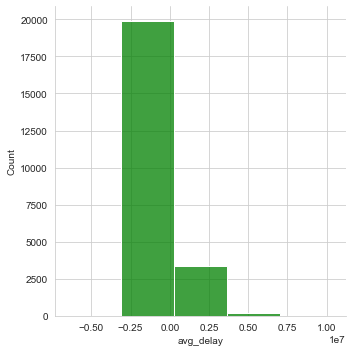

In [51]:
sns.set_style('whitegrid')
sns.displot(data=y_train, color='green', bins=5)
plt.show()

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [52]:
temp_X_train = X_train.groupby(by=["name_customer"], as_index=False)["doc_id"].count()
temp_X_train

,name_customer,doc_id
0,10167 systems,1
1,11078 corporation,1
2,7 - E llc,1
3,99 CE,2
4,99 CE associates,4
...,...,...
3103,YEN BROS,1
3104,YEN BROS corporation,1
3105,YEN BROS foundation,1
3106,YEN BROS us,2


### You can make another distribution plot of the "doc_id" column from x_train

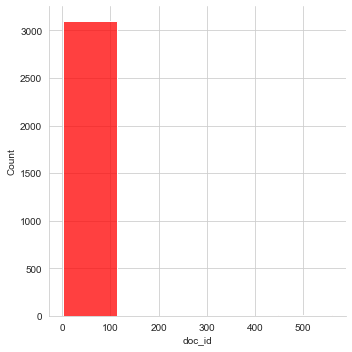

In [53]:
sns.displot(data=temp_X_train, x="doc_id", kde=False, color='red', bins=5)
plt.show()

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


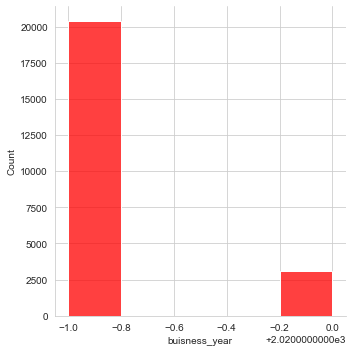

In [54]:
sns.displot(data=X_train, x="buisness_year", color='red', bins=5)
plt.show()

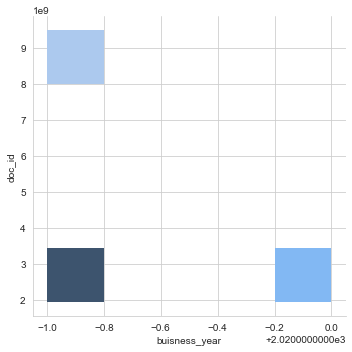

In [55]:
sns.displot(data=X_train, x="buisness_year", y="doc_id", bins=5)
plt.show()

# Feature Engineering 

### Display and describe the X_train dataframe 

In [56]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
19933,U001,0200769623,WAL-MAR systems,2019,1.929773e+09,2019-08-22,2019-09-06,2019-08-22,NAH4,6801.32
5255,U001,0200706844,WINC corporation,2020,1.930532e+09,2020-02-15,2020-03-01,2020-02-15,NAA8,9742.06
43481,CA02,0140106293,ATLANT corp,2019,2.960575e+09,2019-08-23,2019-09-09,2019-08-30,CA10,8775.41
6383,U001,0200794332,COST in,2019,1.929834e+09,2019-09-05,2019-09-20,2019-09-05,NAAX,10677.74
7043,U001,0200794332,COST in,2019,1.929661e+09,2019-07-26,2019-08-10,2019-07-26,NAAX,51407.61
...,...,...,...,...,...,...,...,...,...,...
9784,U001,0200707741,SMART & foundation,2019,1.928902e+09,2019-03-05,2019-03-20,2019-03-05,NAX2,4.27
41436,U001,0200786288,FAMILY llc,2019,1.930137e+09,2019-11-11,2019-11-26,2019-11-11,NAC6,72246.37
6523,U001,0200759878,SA associates,2019,1.929198e+09,2019-04-25,2019-05-10,2019-04-25,NAH4,13768.73
15355,U001,0200792734,MDV/ corporation,2020,1.930508e+09,2020-02-11,2020-02-26,2020-02-11,NAA8,27419.79


In [57]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23479.000000,2.347900e+04,23479.000000
mean,2019.132075,2.012405e+09,31328.822392
std,0.338580,2.967792e+08,36884.508791
min,2019.000000,1.928502e+09,1.855000
25%,2019.000000,1.929174e+09,4750.170000
50%,2019.000000,1.929717e+09,17283.500000
75%,2019.000000,1.930206e+09,45939.095000
max,2020.000000,9.500000e+09,525663.660000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [58]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [59]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [60]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [61]:
X_train[["business_code", "business_code_enc"]]

,business_code,business_code_enc
19933,U001,1
5255,U001,1
43481,CA02,0
6383,U001,1
7043,U001,1
...,...,...
9784,U001,1
41436,U001,1
6523,U001,1
15355,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [62]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [63]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [64]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [65]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [66]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [67]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [68]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [69]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [70]:
pd.DataFrame(X_train.dtypes)

,0
cust_number,int32
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
converted_usd,float64
business_code_enc,int32
name_customer_enc,int32
cust_payment_terms_enc,int32


In [71]:
pd.DataFrame(X_test.dtypes)

,0
cust_number,int32
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
converted_usd,float64
business_code_enc,int32
name_customer_enc,int32
cust_payment_terms_enc,int32


In [72]:
pd.DataFrame(X_val.dtypes)

,0
cust_number,int32
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
converted_usd,float64
business_code_enc,int32
name_customer_enc,int32
cust_payment_terms_enc,int32


### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [73]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [74]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [75]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [76]:
X_train, X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [77]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [78]:
X_train, X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [79]:
pd.DataFrame({"Train":X_train.dtypes,"Test":X_test.dtypes,"Validation":X_val.dtypes})

,Train,Test,Validation
cust_number,int32,int32,int32
buisness_year,int16,int16,int16
doc_id,float64,float64,float64
converted_usd,float64,float64,float64
business_code_enc,int32,int32,int32
name_customer_enc,int32,int32,int32
cust_payment_terms_enc,int32,int32,int32
day_of_postingdate,int64,int64,int64
month_of_postingdate,int64,int64,int64
year_of_postingdate,int64,int64,int64


# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [80]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [81]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [82]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [83]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [84]:
train=X_train.copy()
handling_correlation(train.copy(), threshold=0.85)

['year_of_postingdate',
 'day_of_createdate',
 'month_of_createdate',
 'year_of_createdate',
 'month_of_due',
 'year_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

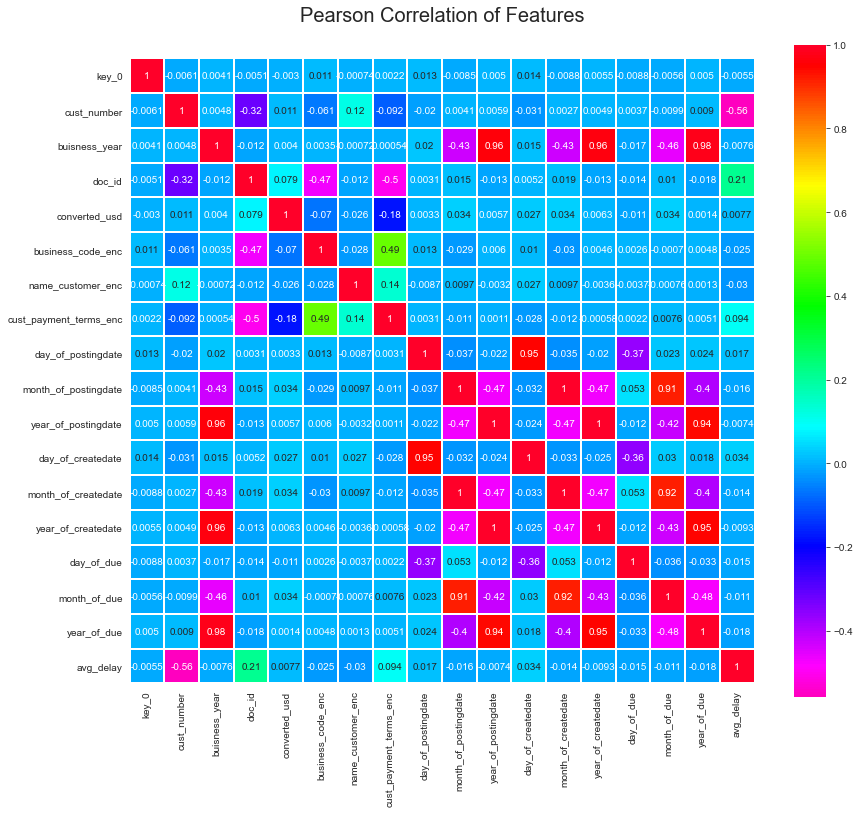

In [85]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)
plt.show()

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [86]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [87]:
sel.variances_

array([1.82302415e+15, 1.14631541e-01, 8.80741147e+16, 1.36040904e+09,
       3.00249223e-01, 1.07331963e+06, 1.25481824e+02, 7.56901859e+01,
       1.21518808e+01, 1.15158549e-01, 7.74106286e+01, 1.21501218e+01,
       1.15201617e-01, 7.74850223e+01, 1.19329589e+01, 1.17995254e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [88]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [89]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [90]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [91]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

542971.3229588264

### Display The Comparison Lists

In [92]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[269365551082.38055],[0.3648736003336539],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
from sklearn.svm import SVR

Algorithm.append('SVR')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [94]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [95]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

664204.9879437599

### Display The Comparison Lists

In [96]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR'],[269365551082.38055, 429030750216.87427],[0.3648736003336539, -0.011594669906617172],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.tree import DecisionTreeRegressor

Algorithm.append('DecisionTreRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

496592.1801595073

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor'],[269365551082.38055, 429030750216.87427, 279955304782.94434],[0.3648736003336539, -0.011594669906617172, 0.339904438114631],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.ensemble import RandomForestRegressor

Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

339738.4501151047

### Display The Comparison Lists


In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor', 'RandomForestRegressor'],[269365551082.38055, 429030750216.87427, 279955304782.94434, 99313509155.17076],[0.3648736003336539, -0.011594669906617172, 0.339904438114631, 0.7658325971732611],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [105]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

356770.866461427

### Display The Comparison Lists


In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'SVR', 'DecisionTreRegressor', 'RandomForestRegressor', 'XGB Regressor'],[269365551082.38055, 429030750216.87427, 279955304782.94434, 99313509155.17076, 102825036280.43158],[0.3648736003336539, -0.011594669906617172, 0.339904438114631, 0.7658325971732611, 0.7575529059824766],

## You need to make the comparison list into a comparison dataframe 

In [109]:
comp_df = pd.DataFrame(data = {"Algorithm": Algorithm, "MSE_Score": MSE_Score, "R2_Score": R2_Score})
comp_df

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.693656e+11,0.364874
1,SVR,4.290308e+11,-0.011595
2,DecisionTreRegressor,2.799553e+11,0.339904
3,RandomForestRegressor,9.931351e+10,0.765833
4,XGB Regressor,1.028250e+11,0.757553


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [110]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [111]:
mean_squared_error(y_test,predictedfinal,squared=False)

320663.4314673745

### Calculate the mean Square Error for validation dataset

In [112]:
mean_squared_error(y_val, predict_testfinal, squared=False)

356770.866461427

### Calculate the R2 score for test

In [113]:
r2_score(y_test, predictedfinal)

0.7575529059824766

### Calculate the R2 score for Validation

In [114]:
r2_score(y_val, predict_testfinal)

0.708388601124206

### Calculate the Accuracy for train Dataset 

In [115]:
regressor.score(X_train, y_train)

0.9412307563694231

### Calculate the accuracy for validation

In [116]:
regressor.score(X_val, y_val)

0.708388601124206

### Calculate the accuracy for test

In [117]:
regressor.score(X_test, y_test)

0.7575529059824766

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [118]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR in,NaT,2020,1.930815e+09,2020-04-28,2020-05-13,2020-04-28,NAH4,6361.07
2,U001,CCU013,KRAFT F trust,NaT,2020,1.930666e+09,2020-03-16,2020-03-16,2020-03-16,NAX2,5095.68
10,U001,0200769623,WAL-MAR corp,NaT,2020,1.930711e+09,2020-03-28,2020-04-12,2020-03-28,NAH4,31228.04
11,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,40491.29
16,U001,0200769623,WAL-MAR corp,NaT,2020,1.930838e+09,2020-04-29,2020-05-14,2020-04-29,NAH4,18453.58
...,...,...,...,...,...,...,...,...,...,...,...
49980,U001,0200707822,PUBLI us,NaT,2020,1.930862e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,171301.72
49982,U001,0200020431,DEC co,NaT,2020,1.930826e+09,2020-04-25,2020-05-09,2020-04-16,NAM4,2241.22
49983,U001,0200769623,WAL-MAR,NaT,2020,1.930760e+09,2020-04-09,2020-04-24,2020-04-09,NAH4,6540.07
49993,U001,0200779906,BOZZU corp,NaT,2020,1.930660e+09,2020-03-17,2020-05-21,2020-03-17,NAGD,6276.46


### Check for the number of rows and columns in the nulldata

In [119]:
nulldata.shape

(9722, 11)

### Check the Description and Information of the nulldata 

In [120]:
print("Info:")
nulldata.info()
nulldata.describe()

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 0 to 49997
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9722 non-null   object        
 1   cust_number           9722 non-null   object        
 2   name_customer         9722 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9722 non-null   int16         
 5   doc_id                9722 non-null   float64       
 6   posting_date          9722 non-null   datetime64[ns]
 7   due_in_date           9722 non-null   datetime64[ns]
 8   baseline_create_date  9722 non-null   datetime64[ns]
 9   cust_payment_terms    9722 non-null   object        
 10  converted_usd         9722 non-null   float64       
dtypes: datetime64[ns](4), float64(2), int16(1), object(4)
memory usage: 854.5+ KB


,buisness_year,doc_id,converted_usd
count,9722.0,9.722000e+03,9722.000000
mean,2020.0,2.004034e+09,31049.949524
std,0.0,2.636590e+08,34350.247132
min,2020.0,1.930544e+09,1.620000
25%,2020.0,1.930660e+09,5245.700000
50%,2020.0,1.930731e+09,18093.650000
75%,2020.0,1.930819e+09,46626.635000
max,2020.0,2.960635e+09,409386.960000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [121]:
nulldata1 = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [122]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [123]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [124]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

nulldata.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd',
       'business_code_enc', 'day_of_cleardate', 'month_of_cleardate',
       'year_of_cleardate', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate'],
      dtype='object')

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [125]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [126]:
pd.DataFrame(nulldata.dtypes)

,0
business_code,object
cust_number,int32
name_customer,object
clear_date,datetime64[ns]
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
cust_payment_terms,object


### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [127]:
nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms"
,'day_of_cleardate',"month_of_cleardate","year_of_cleardate"], axis=1, inplace=True)

### Check the information of the "nulldata" dataframe

In [128]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9722 non-null   int32  
 1   buisness_year           9722 non-null   int16  
 2   doc_id                  9722 non-null   float64
 3   converted_usd           9722 non-null   float64
 4   business_code_enc       9722 non-null   int32  
 5   day_of_postingdate      9722 non-null   int64  
 6   month_of_postingdate    9722 non-null   int64  
 7   year_of_postingdate     9722 non-null   int64  
 8   day_of_due              9722 non-null   int64  
 9   month_of_due            9722 non-null   int64  
 10  year_of_due             9722 non-null   int64  
 11  day_of_createdate       9722 non-null   int64  
 12  month_of_createdate     9722 non-null   int64  
 13  year_of_createdate      9722 non-null   int64  
 14  cust_payment_terms_enc  9722 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [129]:
nulldata.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9722 non-null   int32  
 1   buisness_year           9722 non-null   int16  
 2   doc_id                  9722 non-null   float64
 3   converted_usd           9722 non-null   float64
 4   business_code_enc       9722 non-null   int32  
 5   day_of_postingdate      9722 non-null   int64  
 6   month_of_postingdate    9722 non-null   int64  
 7   year_of_postingdate     9722 non-null   int64  
 8   day_of_due              9722 non-null   int64  
 9   month_of_due            9722 non-null   int64  
 10  year_of_due             9722 non-null   int64  
 11  day_of_createdate       9722 non-null   int64  
 12  month_of_createdate     9722 non-null   int64  
 13  year_of_createdate      9722 non-null   int64  
 14  cust_payment_terms_enc  9722 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [130]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [131]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [132]:
nulldata2 = nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [133]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
0,200769623,2020,1.930815e+09,6361.07,63,3004,34,28,4,2020,28,4,2020,13,5,2020
2,2013,2020,1.930666e+09,5095.68,63,1574,62,16,3,2020,16,3,2020,16,3,2020
10,200769623,2020,1.930711e+09,31228.04,63,3001,34,28,3,2020,28,3,2020,12,4,2020
11,200769623,2020,1.930843e+09,40491.29,63,3002,34,1,5,2020,1,5,2020,16,5,2020
16,200769623,2020,1.930838e+09,18453.58,63,3001,34,29,4,2020,29,4,2020,14,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,200707822,2020,1.930862e+09,171301.72,63,2232,20,6,5,2020,6,5,2020,21,5,2020
49982,200020431,2020,1.930826e+09,2241.22,63,719,38,25,4,2020,16,4,2020,9,5,2020
49983,200769623,2020,1.930760e+09,6540.07,63,2998,34,9,4,2020,9,4,2020,24,4,2020
49993,200779906,2020,1.930660e+09,6276.46,63,349,33,17,3,2020,17,3,2020,21,5,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [134]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [135]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [136]:
pd.DataFrame(final_result)

,avg_delay
0,-1.325871e+05
1,3.524640e+06
2,-7.076742e+04
3,-1.094878e+05
4,-1.248442e+05
...,...
9717,2.246721e+04
9718,-2.601605e+05
9719,-9.434566e+04
9720,-7.934954e+04


### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [137]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index)

### Display the "Final" dataframe 

In [138]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,0,U001,0200769623,WAL-MAR in,NaT,2020,1.930815e+09,2020-04-28,2020-05-13,2020-04-28,NAH4,6361.07,-1.325871e+05
1,2,U001,CCU013,KRAFT F trust,NaT,2020,1.930666e+09,2020-03-16,2020-03-16,2020-03-16,NAX2,5095.68,3.524640e+06
2,10,U001,0200769623,WAL-MAR corp,NaT,2020,1.930711e+09,2020-03-28,2020-04-12,2020-03-28,NAH4,31228.04,-7.076742e+04
3,11,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,40491.29,-1.094878e+05
4,16,U001,0200769623,WAL-MAR corp,NaT,2020,1.930838e+09,2020-04-29,2020-05-14,2020-04-29,NAH4,18453.58,-1.248442e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,49980,U001,0200707822,PUBLI us,NaT,2020,1.930862e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,171301.72,2.246721e+04
9718,49982,U001,0200020431,DEC co,NaT,2020,1.930826e+09,2020-04-25,2020-05-09,2020-04-16,NAM4,2241.22,-2.601605e+05
9719,49983,U001,0200769623,WAL-MAR,NaT,2020,1.930760e+09,2020-04-09,2020-04-24,2020-04-09,NAH4,6540.07,-9.434566e+04
9720,49993,U001,0200779906,BOZZU corp,NaT,2020,1.930660e+09,2020-03-17,2020-05-21,2020-03-17,NAGD,6276.46,-7.934954e+04


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [139]:
Final.shape

(9722, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [140]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [141]:
pd.DataFrame(Final['clear_date'])

,clear_date
0,2020-05-11 11:10:12.921875000
1,2020-04-25 19:04:00.500000000
2,2020-04-11 04:20:32.578125000
3,2020-05-14 17:35:12.234375000
4,2020-05-12 13:19:15.796875000
...,...
9717,2020-05-21 06:14:27.205078125
9718,2020-05-05 23:43:59.546875000
9719,2020-04-22 21:47:34.335937500
9720,2020-05-20 01:57:30.460937500


### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [142]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [143]:
Final[['avg_delay']]

,avg_delay
0,-2.0
1,40.0
2,-1.0
3,-2.0
4,-2.0
...,...
9717,0.0
9718,-4.0
9719,-2.0
9720,-1.0


### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [144]:

bins = [-float('inf'), 0, 15, 30, 45, 60, float('inf')]
labels = ['<=0', '0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [145]:
Final.drop(['key_0',"avg_delay"], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [146]:
pd.DataFrame(Final['Aging Bucket'].value_counts())

,Aging Bucket
0-15,5394
<=0,4191
31-45,67
16-30,61
46-60,5
Greatar than 60,4


### Display your final dataset with aging buckets 

In [147]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,U001,0200769623,WAL-MAR in,2020-05-11 11:10:12.921875000,2020,1.930815e+09,2020-04-28,2020-05-13,2020-04-28,NAH4,6361.07,<=0
1,U001,CCU013,KRAFT F trust,2020-04-25 19:04:00.500000000,2020,1.930666e+09,2020-03-16,2020-03-16,2020-03-16,NAX2,5095.68,31-45
2,U001,0200769623,WAL-MAR corp,2020-04-11 04:20:32.578125000,2020,1.930711e+09,2020-03-28,2020-04-12,2020-03-28,NAH4,31228.04,<=0
3,U001,0200769623,WAL-MAR corporation,2020-05-14 17:35:12.234375000,2020,1.930843e+09,2020-05-01,2020-05-16,2020-05-01,NAH4,40491.29,<=0
4,U001,0200769623,WAL-MAR corp,2020-05-12 13:19:15.796875000,2020,1.930838e+09,2020-04-29,2020-05-14,2020-04-29,NAH4,18453.58,<=0
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,U001,0200707822,PUBLI us,2020-05-21 06:14:27.205078125,2020,1.930862e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,171301.72,0-15
9718,U001,0200020431,DEC co,2020-05-05 23:43:59.546875000,2020,1.930826e+09,2020-04-25,2020-05-09,2020-04-16,NAM4,2241.22,<=0
9719,U001,0200769623,WAL-MAR,2020-04-22 21:47:34.335937500,2020,1.930760e+09,2020-04-09,2020-04-24,2020-04-09,NAH4,6540.07,<=0
9720,U001,0200779906,BOZZU corp,2020-05-20 01:57:30.460937500,2020,1.930660e+09,2020-03-17,2020-05-21,2020-03-17,NAGD,6276.46,<=0


### Store this dataframe into the .csv format

In [148]:
Final.to_excel('invoices.xlsx', index=False)

# END OF THE PROJECT